# Individual Lab2 - Text Summarization for Webpage
**Course:** AIT526 Fall 2021<br>
**Professor:** Dr. Liao<br>
**Student:** Robb Dunlap<br>
**Date:** September 25, 2021

## Task 1 (5 points) Text Summarization with Word Frequencies

### 1.1 (0 points) 
Use the web scraping technique with BeautifulSoup as shown in class to get the text data from the specified data location on the Wikipedia webpage. Hints: Please see code snippets for web scraping in the lecture slides.

Text data location: https://en.wikipedia.org/wiki/Natural_language_processing

In [348]:
# Dependencies
import requests
from bs4 import BeautifulSoup, SoupStrainer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import matplotlib.pyplot as plt
import re

In [260]:
# packages that need to be loaded into the virtual environment only once (if they haven't been run before)
# nltk.download('punkt') # this is necessary if it's the first time using word_tokenizer in your environment
# nltk.download('stopwords')
#nltk.download('wordnet')

In [214]:
# code snippet from https://towardsdatascience.com/using-beautifulsoup-on-wikipedia-dd0c620d5861

url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
page = requests.get(url)

# I chose to use 'html.parser' instead of 'lxml' because the html in the article is well
# formed and I didn't want to install the lxml library for this project

soup = BeautifulSoup(page.content, 'html.parser')

# Save the requests object for testing so I don't have to keep scraping it from Wikipedia
# Modified code snippet from https://www.studytonight.com/post/how-to-scrape-content-from-a-website-using-beautifulsoup-python

with open('canned_soup', 'w', encoding='utf-8') as file:
    for line in soup_direct:
        file.write(str(line))

In [16]:
# function for removing gathering only the text from the wikipedia article

def wiki_article_processor(canned_soup_file):
    
    # Selecting just the content between paragraph markers (<p></p>) results in just having text but it unfortunately
    # much of the important content is structured as list markers (<li></li>). Selecting both paragraph and list markers
    # brings in the missing text but that results in a bunch of additional text that we don't want in the analysis 
    # (for example, the TOC and the references). To solve this, I deleted these items from the Beautiful Soup object 
    # (canned_soup_file) before extracting the text from the paragraph and list sections.

    # inspiration from https://medium.datadriveninvestor.com/web-scraping-wikipedia-with-beautifulsoup-a5d5fe6454ee, 
    # https://stackoverflow.com/questions/26507463/using-beautifulsoup-how-do-i-remove-a-single-class-from-an-element-with-multiple, 
    # https://kaijento.github.io/2017/03/30/beautifulsoup-removing-tags/, and 
    # https://beautiful-soup-4.readthedocs.io/en/latest/#parsing-only-part-of-a-document


    # removes everything that's not part of the bodyContent div tag
    only_bodyContent = SoupStrainer(id = 'bodyContent')
    canned_soup_file = canned_soup_file.find(only_bodyContent)

    removal_lst = [['ol',{'class','references'}],
                   ['div',{'class', 'refbegin'}],
                   ['div', {'class':'toc'}],
                   ['div', {'role':'navigation'}],
                   ['div', {'id':'catlinks'}],
                   ['div', {'class':'div-col'}],
                   ['sup', {'class':'reference'}]
                  ]

    for removal_target in removal_lst:
        for paragraph in canned_soup_file.find_all(removal_target[0],removal_target[1]):
            paragraph.decompose()


    # create a string of all the content in the article
    article_text = ''
    for paragraph in canned_soup_file.find_all(['p', 'li']):
        article_text += paragraph.text
        article_text += " "


    # Quantification of the amount of characters captured from the scrape and initial processing
    # plus demonstration of the beginning and ending portions of the capture
    print(f'Total number of characters scraped and gathered from the article: {len(article_text)}')
    print('')
    print('Start of the text captured from the article')
    print(article_text[:300])
    print('')
    print('End of the text captured from the article')
    print(article_text[-300:])
    
    return article_text

In [ ]:
# this was the first version of the code to remove all the extraneous content. The above cell
# has the improved version - don't run this block anymore - delete before submitting

# Selecting just the content between paragraph markers (<p></p>) results in just having text but it unfortunately
# much of the important content is structured as list markers (<li></li>). Selecting both paragraph and list markers
# brings in the missing text but that results in a bunch of additional text that we don't want in the analysis 
# (for example, the TOC and the references). To solve this, I deleted these items from the Beautiful Soup object 
# (soup_from_can) before extracting the text from the paragraph and list sections.

# inspiration from https://medium.datadriveninvestor.com/web-scraping-wikipedia-with-beautifulsoup-a5d5fe6454ee, 
# https://stackoverflow.com/questions/26507463/using-beautifulsoup-how-do-i-remove-a-single-class-from-an-element-with-multiple, 
# https://kaijento.github.io/2017/03/30/beautifulsoup-removing-tags/, and 
# https://beautiful-soup-4.readthedocs.io/en/latest/#parsing-only-part-of-a-document

# # remves everything that's not part of the bodyContent div tag
# only_bodyContent = SoupStrainer(id = 'bodyContent')
# soup_from_can = soup_from_can.find(only_bodyContent)
# print(len(str(soup_from_can)))

# # deletes the "references" section
# for paragraph in soup_from_can.find_all('ol', {'class':'references'}):
#     paragraph.decompose()
# print(len(str(soup_from_can)))

# # deletes the "further reading" section
# for paragraph in soup_from_can.find_all('div', {'class': 'refbegin'}):
#     paragraph.decompose()
# print(len(str(soup_from_can))) 
    
# # deletes the "table of contents"    
# for paragraph in soup_from_can.find_all('div', {'class':'toc'}):
#     paragraph.decompose()
# print(len(str(soup_from_can)))
    
# # deletes the "navigation bar" at the bottom
# for paragraph in soup_from_can.find_all('div', {'role':'navigation'}):
#     paragraph.decompose()
# print(len(str(soup_from_can)))
    
# # deletes the "links to other categories" at the bottom of the page    
# for paragraph in soup_from_can.find_all('div', {'id':'catlinks'}):
#     paragraph.decompose()
# print(len(str(soup_from_can)))
    
# # deletes the "see also" links section at the bottom of the article
# for paragraph in soup_from_can.find_all('div', {'class':'div-col'}):
#     paragraph.decompose()
# print(len(str(soup_from_can))) 

# # deletes the endnote numbers from the text
# for paragraph in soup_from_can.find_all('sup', {'class':'reference'}):
#     paragraph.decompose()
# print(len(str(soup_from_can)))

In [252]:
# Import the saved file for processing - only run from here down during development, don't keep
# rescrapping Wikipedia

with open('canned_soup') as file:
    soup_from_can = BeautifulSoup(file, 'html.parser')
    
# run the function to process the web scape into desired text    
processed_soup = wiki_article_processor(soup_from_can)

Total number of characters scraped and gathered from the article: 16372

Start of the text captured from the article
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a com

End of the text captured from the article
d by presence on major conferences of the ACL). More recently, ideas of cognitive NLP have been revived as an approach to achieve explainability, e.g., under the notion of "cognitive AI". Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit).
 


**Residual to be Removed**<br>
Paragraph returns, parentheses, dashes, and quotes remain in the text, otherwise most other artificial symbols and extraneous text have been removed

### 1.2 (1 point) 
Preprocess the text data and must include tokenizing words, removing stop words and punctuation, etc.

In [271]:
# Function to tokenize a list of words, remove punctuation, remove stop words, and stem

def token_lc_punc_rmstop_lem(input_lst_of_words, print_results):
    
    # Tokenization of the words
    article_words = word_tokenize(input_lst_of_words)
    
    # Removal of punctuation from words

    # this changes all letters to lowercase 
    article_words_wo_punc = [w.lower() for w in article_words if w not in punctuation]

    # this strips punctuation at the start or end of a word
    article_words_wo_punc = [w.strip(punctuation) for w in article_words_wo_punc]
    
    # Removal of stop words
    sw = stopwords.words('english')
    article_words_wo_punc_sw = [w for w in article_words_wo_punc if w not in sw]
    article_words_wo_punc_sw = list(filter(None, article_words_wo_punc_sw))
    
    # Lemmatize the words
    #wnl = WordNetLemmatizer()
    #article_words_wo_punc_sw_lemmed = [wnl.lemmatize(w) for w in article_words_wo_punc_sw]
    porter = PorterStemmer()
    article_words_wo_punc_sw_lemmed = [porter.stem(w) for w in article_words_wo_punc_sw]
       
    # print out results for user to see how many words were created from the input (if they pass True into the function)
    if print_results:
        print(f'# of words in the input with punctuation and stopwords removed, and lemmatized:\
        {len(article_words_wo_punc_sw_lemmed)}')
        print('')
        print('The first 20 words of the input string:')
        print(article_words_wo_punc_sw_lemmed[:20])
    
    return article_words_wo_punc_sw_lemmed

In [334]:
article_tokens = token_lc_punc_rmstop_lem(processed_soup, True)

# of words in the input with punctuation and stopwords removed, and lemmatized:        1500

The first 20 words of the input string:
['natur', 'languag', 'process', 'nlp', 'subfield', 'linguist', 'comput', 'scienc', 'artifici', 'intellig', 'concern', 'interact', 'comput', 'human', 'languag', 'particular', 'program', 'comput', 'process', 'analyz']


In [337]:
# the residual of the abbreviation "e.g.", and the right and left quotes remain in the list of words
# after removing punctuation. This will manually remove them to prevent them messing up the analysis

print('total words before removing the "e.g" and the right and left quotes: ',len(article_tokens))
bad_words = ['e.g','”','“']
i=0
article_tokens_cleaned = []
for word in article_tokens:
    if word in bad_words:
        i+=1
    else:
        article_tokens_cleaned.append(word)

print('total words after removing the "e.g" and the right and left quotes: ',len(article_tokens_cleaned))
print('number of words removed during cleaning: ',i)

total words before removing the "e.g" and the right and left quotes:  1500
total words after removing the "e.g" and the right and left quotes:  1465
number of words removed during cleaning:  35


### 1.3 (1 point) 
Calculate word frequencies or weighted word frequencies Hint: it would be easy to use FreqDist() to get original word frequencies.

[('languag', 35), ('system', 24), ('natur', 23), ('nlp', 22), ('learn', 20), ('process', 19), ('machin', 17), ('task', 16), ('rule', 16), ('statist', 16), ('cognit', 16), ('data', 15), ('use', 15), ('research', 14), ('algorithm', 13)]


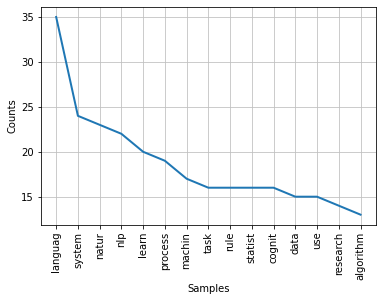

In [344]:
# Calculate the word frequencies, list the top 15, and plot for visualization
article_words_freq = nltk.FreqDist(article_tokens_cleaned)
print(article_words_freq.most_common(15))
article_words_freq.plot(15);

### 1.4 (1.5 points) 
Score the sentences

In [355]:
# Tokenize the sentences
article_sentences = sent_tokenize(processed_soup)

print(f'# of sentences: {len(article_sentences)}')
print('')

# of sentences: 88



In [133]:
# Create sublists of the tokenized words in each sentence. This keeps the words of a sentence grouped
# together after the punctuation has been removed. List comprehension that uses the same function defined above to
# tokenize, remove punctuation, and remove stopwords.

# actually, now I'm just doing this to get word count per sentence
sentence_words_tokens = [token_lc_punc_rmstop_lem(x, False) for x in article_sentences]

# word counting


In [357]:
i = 0
for sent in article_sentences:
    i += 1
    if i < 5:
        print(sent)
        print(len(sent))
        print('')
        

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
281

The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.
138

The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
155

Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.
145



In [369]:
print(len(sent.lower()))
if 'likewise' in sent.lower():
    print('yup')

110
yup


In [352]:
# Modified code from example at https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65

raw_sent_score_dict = dict()
for sent in article_sentences:
    sent_length = len(sent)
    sent_key = sent[:50]
    for word_value in article_words_freq:
        if word_value in sent: 
            if sent_key in raw_sent_score_dict:
                raw_sent_score_dict[sent_key] += article_words_freq[word_value]
            else:
                raw_sent_score_dict[sent_key] = article_words_freq[word_value]
    raw_sent_score_dict[sent_key] = raw_sent_score_dict[sent_key]/sent_length
                
dict(reversed(sorted(raw_sent_score_dict.items(), key=lambda item: item[1])))




TypeError: unhashable type: 'list'

In [354]:
sent

['natural',
 'language',
 'processing',
 'nlp',
 'subfield',
 'linguistics',
 'computer',
 'science',
 'artificial',
 'intelligence',
 'concerned',
 'interactions',
 'computers',
 'human',
 'language',
 'particular',
 'program',
 'computers',
 'process',
 'analyze',
 'large',
 'amounts',
 'natural',
 'language',
 'data']

In [246]:
# Modified code from example at https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65

raw_sent_score_dict = dict()
for sent in sentence_words_tokens:
    sent_length = len(sent)
    reconstructed_sent = ''
    for word in sent:
        reconstructed_sent = reconstructed_sent + word + ' '
        sent_key = reconstructed_sent[:50]
    for word_value in article_words_freq:
        if word_value in recon_sent: 
            if sent_key in raw_sent_score_dict:
                raw_sent_score_dict[sent_key] += article_words_freq[word_value]
            else:
                raw_sent_score_dict[sent_key] = article_words_freq[word_value]
    raw_sent_score_dict[sent_key] = raw_sent_score_dict[sent_key]/sent_length
                
dict(reversed(sorted(raw_sent_score_dict.items(), key=lambda item: item[1])))




{'speech ': 73.0,
 'coarse division given ': 24.333333333333332,
 'misspelled words words accidentally omitted ': 14.6,
 'natural language processing roots 1950s ': 14.6,
 'example consider english word “ big ” ': 10.428571428571429,
 'cognitive science interdisciplinary scientific stu': 10.428571428571429,
 'containing words structures seen erroneous input e': 10.428571428571429,
 'time first many chatterbots written e.g parry ': 10.428571428571429,
 'following list commonly researched tasks natural l': 9.125,
 'major drawback statistical methods require elabora': 9.125,
 'however continue relevant contexts statistical int': 9.125,
 'many different classes machine-learning algorithms': 9.125,
 'research thus increasingly focused unsupervised se': 9.125,
 'lines research continued e.g development chatterbo': 9.125,
 'based long-standing trends field possible extrapol': 8.11111111111111,
 'algorithms take input large set features generated': 8.11111111111111,
 '1980s 1980s early 1990s m

### 1.5 (1.5 points) 
Build a summary based on percentage, sentence count, and word count. Print out all three summarized text examples.<br>
Hints: For example, “percentage = 20%” means only 20% words are used for summarization. “sentence count = 3” means only 3 sentences with top frequencies are selected for summarization. “word count = 50” means the total number of words used for summarization is equal to or less than 50.

## Task 2 (4 points) Text Summarization with N-grams
Based on Task 1, replace the word frequency method with the N-grams technique to summarize the same text:

### 2.1 (0 points) 
Follow the following code examples to generate N-grams with NLTK:

![cat](image_1.png)

### 2.2 (4 points) 
Write the code for text summarization with any N-grams. Note that we will check your program using at least two different n-grams, e.g., n=2, 3, or 4.

#### Hint 1 (0.5 points) 
Use NLTK to get N-grams and FreqDist() to calculate the n-gram frequencies. The running outputs should be similar to:
![cat](image_2.png)

#### Hint 2 (1 point) 
Find weighted frequency occurrences from FreqDist. You can use the similar function from Task 1. The code snippets and running outputs may be similar to:
![cat](image_3.png)

#### Hint 4 (1.5 point) 
Define the function like calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams) to calculate the sentence scores for any N-grams. This function is similar to the one in Task 1.

#### Hing 4 (1 points) 
Getting the summary is the same as Task 1. The following running output examples show the summarized text using tri-grams and 3 sentences (based on percentage, sentence count, and word count). One of the summarized examples are as follows:
![cat](image_4.png)

## Task 3 (1 point) Comparisons
Compare these two methods for text summarization. What are different and why? Please clearly explain (100-300 words).